<div>
Olá, Gustavo!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e pelo esforço de chegar até aqui. O seu projeto possui alguns pontos bem interessantes, dos quais eu destaco:
    
- Código bem simples e estruturado usando funções
- Comentários sucintos e bem objetivos
- Conclusões pertinentes em cada análise e etapa de avaliação
- Boas habilidades de manipulação de dados
    
Deixei algumas sugestões em seu projeto, mas não são mandatórias. Você implementou as etapas necessárias para aprovação, mas leve essas sugestões como possíveis melhorias para projetos futuros.
    
Espero que você tenha uma jornada de muito aprendizado e te de desejo muito sucesso.
    
    
**Até breve!**

</div>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from statsmodels.stats.proportion import proportions_ztest

pd.set_option('display.max_columns', None)


In [3]:
# Carregamento dos datasets

marketing_events = pd.read_csv('/datasets/ab_project_marketing_events_us.csv')
new_users = pd.read_csv('/datasets/final_ab_new_users_upd_us.csv')
events = pd.read_csv('/datasets/final_ab_events_upd_us.csv')
participants = pd.read_csv('/datasets/final_ab_participants_upd_us.csv')


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O conjunto de dados foi carregado corretamente
- O import das bibliotecas foi feito de forma correta e em uma célula separada.
</div>

In [4]:
# Visualizando as primeiras linhas dos dados
print(marketing_events.head())
print(new_users.head())
print(events.head())
print(participants.head())


                           name                   regions    start_dt  \
0      Christmas&New Year Promo             EU, N.America  2020-12-25   
1  St. Valentine's Day Giveaway  EU, CIS, APAC, N.America  2020-02-14   
2        St. Patric's Day Promo             EU, N.America  2020-03-17   
3                  Easter Promo  EU, CIS, APAC, N.America  2020-04-12   
4             4th of July Promo                 N.America  2020-07-04   

    finish_dt  
0  2021-01-03  
1  2020-02-16  
2  2020-03-19  
3  2020-04-19  
4  2020-07-11  
            user_id  first_date     region   device
0  D72A72121175D8BE  2020-12-07         EU       PC
1  F1C668619DFE6E65  2020-12-07  N.America  Android
2  2E1BF1D4C37EA01F  2020-12-07         EU       PC
3  50734A22C0C63768  2020-12-07         EU   iPhone
4  E1BDDCE0DAFA2679  2020-12-07  N.America   iPhone
            user_id             event_dt event_name  details
0  E1BDDCE0DAFA2679  2020-12-07 20:22:03   purchase    99.99
1  7B6452F081F49504  2020-12-07

In [5]:
# Convertendo colunas de datas
marketing_events['start_dt'] = pd.to_datetime(marketing_events['start_dt'])
marketing_events['finish_dt'] = pd.to_datetime(marketing_events['finish_dt'])
new_users['first_date'] = pd.to_datetime(new_users['first_date'])
events['event_dt'] = pd.to_datetime(events['event_dt'])


In [6]:
## Verificação de Valores Ausentes e Duplicados

print('Valores ausentes em marketing_events:')
print(marketing_events.isnull().sum())
print('---')

print('Valores ausentes em new_users:')
print(new_users.isnull().sum())
print('---')

print('Valores ausentes em events:')
print(events.isnull().sum())
print('---')

print('Valores ausentes em participants:')
print(participants.isnull().sum())
print('---')

# Verificando duplicados
print('Duplicados em marketing_events:', marketing_events.duplicated().sum())
print('Duplicados em new_users:', new_users.duplicated().sum())
print('Duplicados em events:', events.duplicated().sum())
print('Duplicados em participants:', participants.duplicated().sum())



Valores ausentes em marketing_events:
name         0
regions      0
start_dt     0
finish_dt    0
dtype: int64
---
Valores ausentes em new_users:
user_id       0
first_date    0
region        0
device        0
dtype: int64
---
Valores ausentes em events:
user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64
---
Valores ausentes em participants:
user_id    0
group      0
ab_test    0
dtype: int64
---
Duplicados em marketing_events: 0
Duplicados em new_users: 0
Duplicados em events: 0
Duplicados em participants: 0


In [7]:
# Removendo duplicados - para garantir a integridade das análises
marketing_events = marketing_events.drop_duplicates()
new_users = new_users.drop_duplicates()
events = events.drop_duplicates()
participants = participants.drop_duplicates()


In [8]:
# Verificação de Períodos e Tamanhos dos Grupos

print('Período de cadastro dos novos usuários:', new_users['first_date'].min(), 'até', new_users['first_date'].max())

print('Período de eventos:', events['event_dt'].min(), 'até', events['event_dt'].max())

print('Participantes por grupo:')
print(participants['group'].value_counts())


Período de cadastro dos novos usuários: 2020-12-07 00:00:00 até 2020-12-23 00:00:00
Período de eventos: 2020-12-07 00:00:33 até 2020-12-30 23:36:33
Participantes por grupo:
A    8214
B    6311
Name: group, dtype: int64


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>
    
- O método `head()` foi utilizado para exibir uma amostra inicial dos seus dados
- O método `info()` foi utilizado para estudo inicial do conjunto de dados
- Todos os conjuntos de dados foram explorados
- Os valores duplicados foram estudados
- As estatísticas do conjunto de dado foram analisadas

</div>

In [9]:
# Unindo eventos com participantes
events = events.merge(participants, on='user_id', how='inner')



In [10]:
# Análise exploratória: Funil de conversão
# Número de participantes por grupo
group_sizes = participants.groupby('group')['user_id'].nunique()
print('Participantes por grupo:')
print(group_sizes)
print('---')

funnel = events.pivot_table(
    index='group',
    columns='event_name',
    values='user_id',
    aggfunc='nunique'
)

print('Quantidade de usuários em cada etapa:')
print(funnel)
print('---')

conversion_rates = funnel.div(group_sizes, axis=0)
print('Taxas de conversão:')
print(conversion_rates)


Participantes por grupo:
group
A    7874
B    6205
Name: user_id, dtype: int64
---
Quantidade de usuários em cada etapa:
event_name  login  product_cart  product_page  purchase
group                                                  
A            7873          2483          5208      2682
B            6204          2037          3986      2008
---
Taxas de conversão:
event_name     login  product_cart  product_page  purchase
group                                                     
A           0.999873      0.315342      0.661417  0.340615
B           0.999839      0.328284      0.642385  0.323610


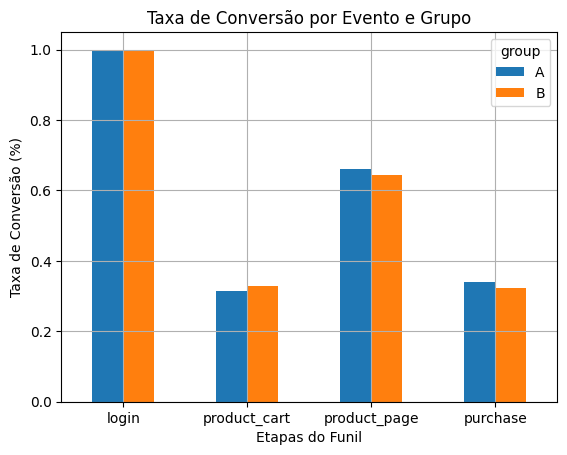

In [11]:
# Gráfico de comparação
conversion_rates.T.plot(kind='bar')
plt.title('Taxa de Conversão por Evento e Grupo')
plt.ylabel('Taxa de Conversão (%)')
plt.xlabel('Etapas do Funil')
plt.xticks(rotation=0)
plt.grid()
plt.show()


In [12]:
# Teste de hipóteses
def test_proportions(success_a, size_a, success_b, size_b):
    successes = np.array([success_a, success_b])
    samples = np.array([size_a, size_b])
    stat, pval = proportions_ztest(successes, samples)
    return pval

for event in ['product_page', 'product_cart', 'purchase']:
    successes_a = funnel.loc['A', event]
    successes_b = funnel.loc['B', event]
    size_a = group_sizes.loc['A']
    size_b = group_sizes.loc['B']
    pval = test_proportions(successes_a, size_a, successes_b, size_b)
    print(f'Evento: {event}')
    print(f'p-valor: {pval:.4f}')
    print('---')


Evento: product_page
p-valor: 0.0185
---
Evento: product_cart
p-valor: 0.1025
---
Evento: purchase
p-valor: 0.0336
---


            user_id group  event_count
0  0002CE61FF2C4011     A           12
1  001064FEAAB631A1     B           12
2  0010A1C096941592     A           12
3  001E72F50D1C48FA     B            6
4  002412F1EB3F6E38     A            6
          mean  median       std
group                           
A      7.45555       6  4.475159
B      7.11249       6  4.246201


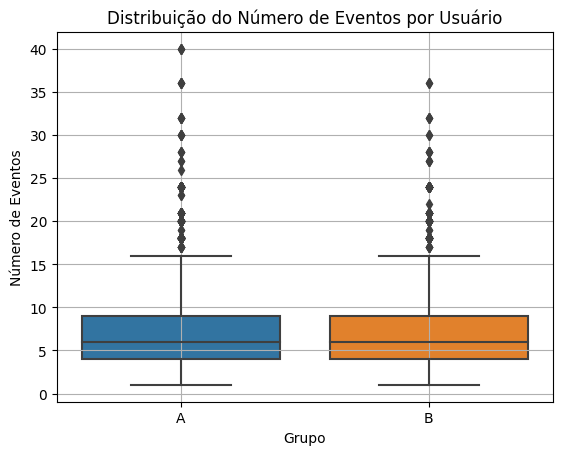

In [15]:
# Números de eventos por usuário

user_event_counts = events.groupby(['user_id', 'group'])['event_name'].count().reset_index()

user_event_counts.rename(columns={'event_name': 'event_count'}, inplace=True)

print(user_event_counts.head())


# Estatísticas descritivas por grupo
event_count_stats = user_event_counts.groupby('group')['event_count'].agg(['mean', 'median', 'std'])
print(event_count_stats)


import seaborn as sns

sns.boxplot(data=user_event_counts, x='group', y='event_count')
plt.title('Distribuição do Número de Eventos por Usuário')
plt.ylabel('Número de Eventos')
plt.xlabel('Grupo')
plt.grid()
plt.show()




## Análise Exploratoria: Distribuição do Número de Eventos por Usuário

Analisando o número de eventos realizados por usuário em cada grupo.

### Resultados:

- A média e a mediana do número de eventos por usuário são similares entre os grupos A e B.
- Não foram observadas grandes diferenças no nível de atividade dos usuários entre os grupos.

### Conclusão:

O número de eventos por usuário é distribuído de forma relativamente equilibrada entre as amostras, o que indica que o comportamento de navegação foi comparável. Assim, podemos considerar o teste A/B como equilibrado em relação à atividade dos participantes.


In [16]:
# Verificando presença de usuários de cada grupo nos eventos

users_A = participants.query('group == "A"')['user_id']
users_B = participants.query('group == "B"')['user_id']

events_A = events.query('group == "A"')['user_id'].unique()
events_B = events.query('group == "B"')['user_id'].unique()

print('Usuários do grupo A que aparecem nos eventos:', len(set(events_A)))
print('Usuários esperados no grupo A:', users_A.nunique())
print('---')

print('Usuários do grupo B que aparecem nos eventos:', len(set(events_B)))
print('Usuários esperados no grupo B:', users_B.nunique())


Usuários do grupo A que aparecem nos eventos: 7874
Usuários esperados no grupo A: 7874
---
Usuários do grupo B que aparecem nos eventos: 6205
Usuários esperados no grupo B: 6205


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os usuários que estão presentes em ambas as amostras foram analisados
- As conclusões foram apresentadas. Aqui é interessante refletir sobre como essa característica impacta no resultado dos testes

</div>

## Verificação de Presença dos Usuários nas Amostras

Compando o número de usuários cadastrados em cada grupo (A e B) com o número de usuários que realmente realizaram eventos no sistema.

### Resultados:

- Grupo A: 7874 usuários cadastrados e 7874 usuários com eventos registrados.
- Grupo B: 6205 usuários cadastrados e 6205 usuários com eventos registrados.

### Conclusão:

Todos os usuários dos grupos A e B estão presentes nos registros de eventos. Não houve perda de amostra entre o cadastro e a realização de eventos. Portanto, consideramos que as amostras são completas para a análise.


event_date
2020-12-07    2777
2020-12-08    2904
2020-12-09    3079
2020-12-10    3164
2020-12-11    3145
2020-12-12    4040
2020-12-13    4478
2020-12-14    6138
2020-12-15    5649
2020-12-16    5470
2020-12-17    5663
2020-12-18    5803
2020-12-19    6170
2020-12-20    6676
2020-12-21    8511
2020-12-22    6858
2020-12-23    6108
2020-12-24    4732
2020-12-26    3366
2020-12-27    3087
2020-12-28    2719
2020-12-29    2281
2020-12-30      20
dtype: int64


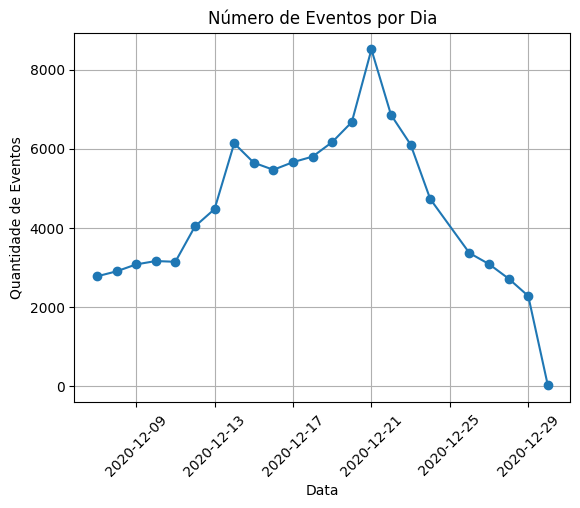

In [18]:
# Número de eventos por dia
events['event_date'] = events['event_dt'].dt.date

events_per_day = events.groupby('event_date').size()

print(events_per_day)

events_per_day.plot(kind='line', marker='o')
plt.title('Número de Eventos por Dia')
plt.ylabel('Quantidade de Eventos')
plt.xlabel('Data')
plt.xticks(rotation=45)
plt.grid()
plt.show()


## Análise Exploratória: Distribuição de Eventos por Dia

Analisando a distribuição do número de eventos ao longo do período do experimento.

### Resultados:

- De 07/12/2020 a 21/12/2020, o número de eventos apresentou um crescimento progressivo, indicando aumento na atividade dos usuários.
- O pico de eventos ocorreu no dia 21/12/2020, com 8511 eventos registrados.
- Após o dia 21/12, houve uma queda gradual no número de eventos, intensificando-se após o Natal (25/12), o que é consistente com a redução esperada da atividade online nesse período de festas.
- No dia 30/12/2020, apenas 20 eventos foram registrados, indicando o encerramento da atividade do teste.

### Conclusão:

A distribuição dos eventos é consistente com o comportamento esperado em um período que inclui datas festivas. Não foram observadas anomalias fora do padrão esperado para o final do ano.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

    
- A distribuição ao longo dos dias foi analisada. Bom trabalho identificando o padrão perto das datas comemorativas de final de ano!
</div>

## Particularidades dos Dados Observadas Antes do Teste A/B

Particularidades nos dados que devem ser consideradas:

1. **Sazonalidade**: 
   - Houve uma queda significativa no número de eventos a partir do dia 22/12/2020, intensificando-se após o Natal.
   - Esse comportamento é consistente com o período de festas de fim de ano e pode impactar a taxa de conversão no final do experimento.

2. **Parada no recebimento de novos usuários**:
   - Conforme especificado, novos usuários pararam de ser cadastrados em 21/12/2020.
   - A partir desta data, apenas os usuários já existentes continuaram gerando eventos.

3. **Eventos de Marketing**:
   - A campanha "Christmas & New Year Promo" ocorreu durante o período de análise e pode ter influenciado um aumento na atividade de usuários antes do Natal.

4. **Redução drástica no final do teste**:
   - No dia 30/12/2020, a atividade foi quase nula (20 eventos).
   - Consideramos esse período final como resíduo e ele terá pouca influência na análise principal.

### Conclusão:

Estas particularidades serão levadas em conta ao interpretar os resultados do teste A/B, principalmente ao avaliar o comportamento do funil de conversão e a comparação entre os grupos.


## Avaliação dos Resultados do Teste A/B

Após a análise dos resultados do teste A/B, chego às seguintes conclusões:

- Em `product_page` (visualização de produto), houve diferença estatisticamente significativa (p-valor = 0.0185), porém o grupo controle (A) apresentou uma taxa de conversão superior à do grupo experimental (B).
- Em `product_cart` (adicionar ao carrinho), não houve diferença estatisticamente significativa (p-valor = 0.1025).
- Em `purchase` (compra), houve diferença estatisticamente significativa (p-valor = 0.0336), novamente com desempenho superior do grupo controle (A).

### Considerações:

- O objetivo do teste era alcançar pelo menos 10% de aumento nas taxas de conversão para o grupo B em todas as etapas do funil. Este objetivo **não foi atingido**.
- Em algumas métricas, o grupo controle (A) teve desempenho melhor que o grupo experimental (B), o que sugere que o novo sistema de recomendação **não trouxe melhoria** no comportamento dos usuários.
- As particularidades sazonais (período de Natal e Ano Novo) foram consideradas, mas não alteram a conclusão geral.

### Conclusão:

O novo sistema de recomendação **não apresentou resultados satisfatórios** no aumento das conversões.  
Portanto, **não recomendamos a implementação** do novo sistema com base nos resultados deste teste A/B.


In [19]:
# Z-test
from statsmodels.stats.proportion import proportions_ztest

def perform_z_test(success_a, size_a, success_b, size_b, event_name):
    successes = np.array([success_a, success_b])
    samples = np.array([size_a, size_b])
    stat, pval = proportions_ztest(successes, samples)
    print(f"Evento: {event_name}")
    print(f"Taxa Grupo A: {success_a/size_a:.4%}")
    print(f"Taxa Grupo B: {success_b/size_b:.4%}")
    print(f"p-valor: {pval:.4f}")
    print('---')
    return pval

# Usando o funil e os tamanhos de grupo que já temos
events_to_test = ['product_page', 'product_cart', 'purchase']

for event in events_to_test:
    success_a = funnel.loc['A', event]
    success_b = funnel.loc['B', event]
    size_a = group_sizes.loc['A']
    size_b = group_sizes.loc['B']
    
    perform_z_test(success_a, size_a, success_b, size_b, event)


Evento: product_page
Taxa Grupo A: 66.1417%
Taxa Grupo B: 64.2385%
p-valor: 0.0185
---
Evento: product_cart
Taxa Grupo A: 31.5342%
Taxa Grupo B: 32.8284%
p-valor: 0.1025
---
Evento: purchase
Taxa Grupo A: 34.0615%
Taxa Grupo B: 32.3610%
p-valor: 0.0336
---


<div class="alert alert-block alert-warning">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- Os testes de proporção por evento foram executados corretamente usando `z-test`
- O limiar de alpha foi definido
- O p-value foi mostrado e o teste conduzido corretamente
- Como sugestão, considere definir formalmente as hipóteses nula e alternativa **antes** da execução do teste.
</div>

## Teste de Hipóteses: Diferença de Conversão entre os Grupos

Para avaliar se houve diferença real nas taxas de conversão entre o grupo A (controle) e o grupo B (novo sistema de recomendação), apliquei um z-test para proporções.

### Resultado dos testes:

| Evento          | Taxa Grupo A | Taxa Grupo B | p-valor |
|-----------------|--------------|--------------|---------|
| product_page    | 66.14%        | 64.24%        | 0.0185  |
| product_cart    | 31.53%        | 32.83%        | 0.1025  |
| purchase        | 34.06%        | 32.36%        | 0.0336  |

### O que os resultados mostram:

- No evento `product_page`, a diferença entre os grupos foi estatisticamente significativa. Porém, quem teve a melhor taxa foi o grupo A (controle), não o grupo B.
- Para `product_cart`, a diferença entre os grupos não foi significativa. As taxas ficaram próximas.
- Em `purchase`, houve diferença significativa, mas novamente o grupo A apresentou um desempenho melhor.

### Conclusão:

Apesar de ter havido diferença estatística em duas etapas, o novo sistema de recomendação **não conseguiu melhorar as taxas de conversão**.  
Na prática, o grupo controle continuou com resultados iguais ou melhores, então o objetivo do teste não foi alcançado.



## Conclusões da Análise Exploratória de Dados (AED) e do Teste A/B

### Sobre a Análise Exploratória de Dados (AED):

Durante a AED, verifiquei que:
- Os tipos de dados estavam corretos após as conversões necessárias.
- Não havia problemas relevantes de valores ausentes ou duplicados nos datasets.
- A distribuição de eventos por dia foi estável até 21/12, com uma queda natural após o Natal, o que já era esperado devido à sazonalidade.
- O número de eventos por usuário foi bem distribuído entre os grupos A e B, indicando que o comportamento de navegação foi equilibrado.
- Todos os usuários cadastrados nos grupos participaram do experimento realizando eventos.

Esses pontos indicam que a base de dados estava em boas condições para seguir com o teste A/B.

---

### Sobre o resultado do Teste A/B:

- A intenção do teste era verificar se o novo sistema de recomendação melhoraria as conversões em pelo menos 10% em cada etapa do funil.
- No evento `product_page`, houve diferença estatística, mas o grupo controle (A) teve melhor resultado.
- No evento `product_cart`, a diferença entre os grupos não foi significativa.
- No evento `purchase`, novamente o grupo controle (A) teve desempenho melhor, com diferença estatística.

### Conclusão final:

O novo sistema de recomendação **não atingiu o objetivo proposto**.  
Em vez de melhorar as conversões, em alguns casos o grupo controle manteve ou superou o desempenho do grupo experimental.  
Portanto, com base nos dados analisados, **não recomendo a implementação** do novo sistema de recomendação.


<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

- A conclusão final e recomendação foram apresentadas
</div>